In [3]:
import matplotlib.pyplot as plt
from linear_genetic_programming.lgp_classifier import LGPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

In [4]:
# load data set. Note it only supports binary classification
X, y = load_breast_cancer(return_X_y=True)
# normalize
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [5]:
# set populationSize and maxGeneration higher when having compute power
lgp = LGPClassifier(numberOfInput = X_train.shape[1], numberOfVariable = 18, populationSize = 300,
                    maxGeneration = 100, showGenerationStat = True, tournamentSize=8, isRandomSampling=True) 


### GenerationStat parameter:
* Gen: Generation.
* Best Indv: best individual fitness (calculated using random sampled training set)
* CE: Classification error: misclassified samples
* Pop Avg: Population average fitness. Showing how good population evolves.
* Ran Sampling: Shows random sampling size. It is a random number from 1/2 population to 
whole population. Use random sampling Technique to prevent overfitting.
* AvgProLen: Average program length in population.
* AvgEffProg: Average effective program length in population.

In [6]:
lgp.fit(X_train, y_train)


Gen|Best Indv|  CE  |Pop Avg|Ran Sampling|AvgProgLen|AvgEffProgLen
--- --------- ------ ------- ------------ ---------- -------------
  0|     0.89|    43|   0.77|         218|     33.03|         1.11
  1|     0.93|    24|   0.87|         228|     32.59|         1.26
  2|     0.93|    16|   0.91|         245|     39.42|         1.62
  3|     0.94|    23|   0.92|         355|     45.87|         1.36
  4|     0.94|    21|   0.92|         396|     48.30|         1.25
  5|     0.94|    16|   0.92|         378|     50.90|         1.21
  6|     0.94|    14|   0.92|         382|     53.22|         1.13
  7|     0.94|    14|   0.92|         262|     53.12|         1.11
  8|     0.94|    13|   0.92|         318|     54.58|         1.06
  9|     0.95|    10|   0.92|         311|     56.38|         1.04
 10|     0.95|    10|   0.92|         425|     54.24|         1.04
 11|     0.95|    10|   0.92|         214|     53.80|         1.06
 12|     0.95|    10|   0.92|         283|     55.93|         

LGPClassifier(constInitRange=(1, 11, 1), fitnessThreshold=1.0,
              isRandomSampling=True, maxGeneration=100, maxProgLength=300,
              max_prog_ini_length=30, minProgLength=10, min_prog_ini_length=10,
              numberOfConstant=9, numberOfInput=30, numberOfOperation=5,
              numberOfVariable=18, pConst=0.5, pCrossover=0.75, pInsert=0.5,
              pMacro=0.75, pMicro=0.5, pRegmut=0.6, populationSize=300,
              showGenerationStat=True, tournamentSize=8)

In [7]:
print(lgp.bestProgStr_)

I0:  <-, r14, 2.0, r18>
I1:  <+, r2, r21, r22>
I2:  <-, r1, 10.0, r29>
I3:  <if greater, 10.0, r25>
I4:  <if less, r36, r10>
I5:  <^, r17, r8, r14>
I6:  <if less, r40, 2.0>
I7:  <+, r16, 3.0, r27>
I8:  <if greater, 2.0, r2>
I9:  <if greater, 2.0, r33>
I10:  <if less, 6.0, r10>
I11:  <if less, 10.0, r45>
I12:  </, r14, 1.0, r22>
I13:  <if less, r45, r45>
I14:  </, r14, 1.0, r22>
I15:  <*, r9, 1.0, r16>
I16:  <if greater, 8.0, r32>
I17:  <-, r3, r7, 10.0>
I18:  </, r14, r9, r11>
I19:  <if greater, 10.0, r13>
I20:  <if greater, 10.0, r25>
I21:  <if less, r22, 10.0>
I22:  <-, r3, r10, 10.0>
I23:  <if less, r4, r10>
I24:  <^, r17, r8, r14>
I25:  <if less, r40, 2.0>
I26:  <*, r16, 3.0, r27>
I27:  <*, r0, r45, r30>
I28:  <if greater, 10.0, r15>
I29:  <-, r0, 10.0, r38>
I30:  <^, r10, r21, 3.0>
I31:  <*, r0, r45, r21>
I32:  <if less, r41, 1.0>
I33:  </, r8, r24, r15>
I34:  <if greater, r3, r13>
I35:  <^, r12, r21, 3.0>
I36:  <*, r15, r7, 10.0>
I37:  <*, r0, r45, r21>
I38:  <*, r9, 1.0, r16>
I3

In [8]:
print(lgp.bestEffProgStr_)

I0:  <*, r0, r45, r30>



In [9]:
y_pred = lgp.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.916083916083916


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88        53
           1       0.89      0.99      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.89      0.91       143
weighted avg       0.92      0.92      0.91       143



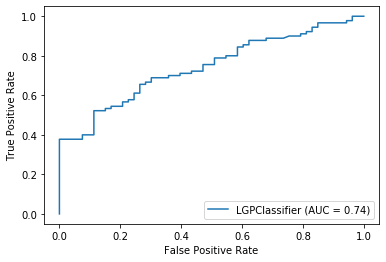

In [9]:
# draw ROC curve
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(lgp, X_test, y_test)
plt.show()
